# Laboratorio 6

Integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

enlace al repositorio: https://github.com/angelargd8/lab6-modsim

# Teoría parte 1


****1. El ELE se encuentra en (S* = N, I* = 0). Describa en términos conceptuales por qué este es un estado de "balance" en el sistema. ¿Qué flujos de entrada y salida se están equilibrando exactamente en el compartimento de susceptibles (S) para que su nivel permanezca constante**

Un estado de balance en el sistema significa que toda la población es suceptible y no hay individuos infectados. Y eso es así, ya que en ese punto no hay dinámica, entonces nada cambia con el tiempo. Porque si no hay infectados (I=0) no se producen nuevos contagios. Los suceptibles no disminuyen porque no hay infección que los saque del compartimento. Y tampoco hay entradas o salidas netas de S por necimientos, muertes o curaciones, entonces el número de susceptibles permaneces S = N, y el número de infectados y recuperados se mantiene en 0.

Los flujos que se equilibran en el compartimiento de S, está el de la entrada, los individuos que se vuelven suceptibles. Y el de la salida que son los individuos que dejan de ser suceptibles. 
Entonces,
$$
S* = N
I* = 0
$$
Y el flujo de salida es cero, porque I= 0
$$
(−𝛽𝑆𝐼/𝑁−βSI/N) = 0
$$

Entonces, si se considera el modelo básico sin nacimientos ni muertes, el flujo de entrada también es 0. Entonces la tasa de entrada y salidas son iguales, nulas, entonces no existe un cambio neto.
$$
dS/dt =0
$$




***2.  El equilibrio endémico representa un estado donde la enfermedad persiste de forma estable. Explique la tensión fundamental que existe en este equilibrio. ¿Qué fuerza impulsa el aumento de infecciones y qué fuerza contraria la frena, permitiendo que el número de infectados I* se mantenga constante y no sea cero?**

Si el equilibio endémico alcanza un punto donde la enfermedad no desaparece, pero tambpoco crece indefinidamente, entonces el número de infectados I* se mantiene constante y distinto de 0 en el tiempo. Esto se fa porque dos fuerzas opuestas se equilibran de manera dinámica. La primera es la de propagación, porque cada infectado contagia a nuevos suceptible a a una tasa proporcional a βSI/N y el efecto de este sobre I es que tiende a aumentar el número de los infectados. Mientras que la otra fuerza es la de recuperación, en está los infectados se curan o mueren en una tasa de γI y el efecto que provoca sobre I, es que tiende a disminuor el número de los infectados. Entonces, en ese estado las dos tasas se igualan 
$$
\text{tasa de infección = tasa de recuperación}
$$
$$
βS∗(I/N) = γI∗
$$
$$
S∗ = γN/β
$$
Enotces, la cantidad de suceptibles disponibles que es S*, se reduce hasta un punto en que cada infectado en promedio se contagia exactamente a una persona antes de recuperarse, entonces el número de infectados se mantiene estable, porque no aumente ni disminuye. 

***3. Imagine que quiere construir un Modelo Basado en Agentes (MBA) que represente la misma dinámica de este modelo SIR. ¿Cómo implementaría los procesos de "nacimiento" (μN) y "muerte natural" (μS, μI, μR) a nivel de agentes individuales? Describa las reglas o eventos que programaría para los agentes.***

Los agentes tendrían, estados, edad, relojes por procesospara la infección recuperación, muerte y una red de contactos, que serian los vecinos. 
Para nacimiento, el nivel sería global, y tendría Δt discreto para cada paso y que se generen nuevos agentes. Mientras que con event-driven se progamarían eventos birth con una tasa de 𝜇𝑁(𝑡), entonces cuando ocurre un nacimiento se crea un agente con state = s con age de 0, se asigna la pisicion en la red, digamos se conecta con k vecinos. 
Mientras que en la muerte natural, el nivel es individual por agente y estado. Y para cada agente en estado de X∈{S,I,R} muere con 
$$
p_{\text{death}\mid X} = 1 - e^{-\mu_X \,\Delta t} \approx \mu_X \,\Delta t
$$
eso es de manera discreta. Mientras, que con event-drivem cada agente se lleva un reloj con death|X con tasa de μX. Y al morir se eliminarian los agentes de la simulacion, se liberarian los enlaces a los vecions y las métricas. Estas reglas producen flujos demograficos del SIR, nacimientos añaden susceptibles y las muertes disminuyen individuos proporcionalmente a su estado.


**4. Si ejecutara su MBA y graficara el número total de susceptibles contra el número total de infectados (un espacio de estados proyectado), ¿esperaría que las trayectorias se vieran idénticas a las del modelo de ecuaciones diferenciales? ¿Por qué sí o por qué no? Mencione al menos un factor clave inherente a los MBA que introduciría diferencias en el gráfico.**

No, no podría esperarse que las trayectorias se vieran identicas a las del modelo de ecuaciones diferenciasles, ya que en un SIR-ODE la trayectoria de (𝑆(𝑡),𝐼(𝑡)) es determinista y suave. Entonces en un MBA aunque el primedio de varias corridas puede ser aproximarse, cada corrida individual se suele desviar y eso es por el factor estocástico por la población que es finita, ya que los contagios, recuperaciones, nacimientos y muertes ocurren por eventos aleatorios entre los agentes discretos. Por lo tanto, la "fuerza de infección" fluctúa y la trayectoria tiembla alrededor del camino de ODE, entonces este puede tener bucles irregualares o caer en I=0. 




# Teoría parte 2


**1. La matriz Jacobiana es una "instantánea" de las fuerzas del sistema en un punto específico. Explique conceptualmente qué representa el elemento en la esquina inferior izquierda de la matriz (∂(dI/dt)/∂S). ¿Qué nos dice este término sobre la relación entre los susceptibles y la propagación de la infección?**
$$
∂/∂s (∂I/∂t)
$$
mide cuánto cambia la velocidad de crecimiento de los infectados ante un pequeño cambio en el número de susceptibles, manteniendo lo demás fijo. En el SIR clásico el elemento es:
$$
dI/dt = β(SI/N) - γI => ∂(∂I/∂t)/∂S = β(I/N) > 0
$$
Donde:
- Tienen una mayor tasa instantánea de propagación.
- La magnitud β(I/N): la sensibilidad crece con el número de infectados y la tasa de contacto.
- Implicación: si I = 0 (equilibrio libre de enfermedad), la reducción de S (por ejemplo con vacunación) disminuye el crecimiento de I.

**2. El análisis muestra que cuando R₀ > 1, el Equilibrio Libre de Enfermedad es inestable. Describa en una o dos frases qué significa esto en el contexto de una política de salud pública de "esperar y ver". ¿Por qué la inestabilidad de este punto hace que esa política sea arriesgada?**
Si R₀ > 1, cualquier pequeña introducción de casos crece por lo que "esperar y ver" permite que el brote despegue exponencialmente. Esa inestabilidad vuelve la política arriesgada. Cada día de demora aumentan los casos, los costos y la dificultad para devolver Re < 1.

**3. El Equilibrio Endémico, cuando existe, suele ser estable. ¿Qué significa "estabilidad" en este contexto? Si una nueva variante del virus, más contagiosa, causa un aumento repentino de casos (una perturbación), ¿qué predice la estabilidad de este equilibrio sobre el comportamiento del sistema a largo plazo?**
Estabilidad se refiere a que pequeñas perturbaciones alrededor del equilibrio se disipan y las trayectorias regresan a ese punto. Si una variante más contagiosa provoca un pico súbito, la estabilidad predice que los casos volverán hacia el equilibrio, pero si aumenta el R₀, el equilibrio anterior deja de ser equilibrio y el sistema converge a uno nuevo a menos que se tengan medidas que reduzcan el Re < 1. 

**4. En un modelo de ecuaciones, un equilibrio estable es un punto fijo. En un MBA, debido a la aleatoriedad (estocasticidad), el sistema nunca se asienta perfectamente en un punto. ¿Cómo se manifestaría un "equilibrio estable" en el espacio de estados proyectado de un MBA? Describa cómo se vería la trayectoria del sistema una vez que ha alcanzado este estado de equilibrio.**
En un MBA, el equlibrio estable se ve en la distribución estacionaria, es decir que no es un punto exacto. En el espacio de estados, la trayectoria converge hacia una zona y luego oscila de forma aleatoria alrededor de un centro sin derivar sistemáticamente. En el tiempo, son series estacionarias con media casi constante, fluctuaciones mean-reverting y autocorrelación que se desvanece si hay algo que llegue a afectar el equilibrio. En cuanto a escala poblacional, a mayor N, el centro se va estrechando, la varianza disminuye y se aproxima al punto fijo del modelo.

# Práctica parte 1
Deberá simular el modelo SIR con dinámica vital y visualizar cómo las trayectorias del sistema convergen a los puntos de equilibrio en el espacio de estados. 

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


R0 = 4.1667
Equilibria (S*, I*):
Disease-free equilibrium (DFE): 
S* = 1000.0000, I* = 0.0000
Endemic equilibrium:
S* = 240.0000, I* = 126.6667


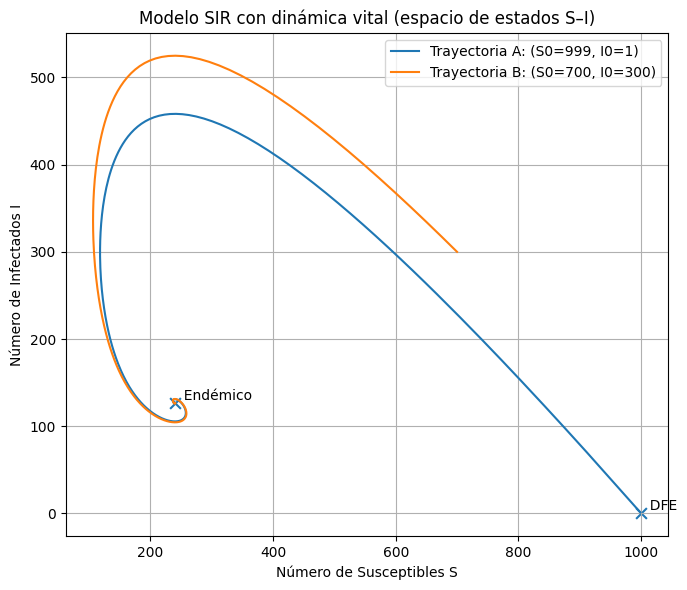

In [2]:
#configuracion de la simulacion

N = 1000.0
beta = 0.5/ N
gamma = 0.1
mu = 0.02


def sir_vital(t, y):
    S, I = y
    dS = mu*N - beta*S*I - mu*S
    dI = beta*S*I - (gamma + mu)*I
    return [dS, dI]

# simular trayectorias
# time horizon 
t_span = (0, 300.0)
t_eval = np.linspace(t_span[0], t_span[1], 1201)

# condiciones iniciales
y0_a = [999.0, 1.0]   # inicio del brote
y0_b = [700.0, 300.0] # epidemia mayor

sol_a = solve_ivp(sir_vital, t_span, y0_a, t_eval=t_eval, rtol=1e-8, atol=1e-10)
sol_b = solve_ivp(sir_vital, t_span, y0_b, t_eval=t_eval, rtol=1e-8, atol=1e-10)

# equilibrar
R0 = beta * N / (gamma + mu)
S_endemic = (gamma + mu) / beta
I_endemic = mu * (N - S_endemic) / (beta * S_endemic)

S_dfe = N
I_dfe = 0.0


print(f"R0 = {R0:.4f}")
print("Equilibria (S*, I*):")
print(f"Disease-free equilibrium (DFE): \nS* = {S_dfe:.4f}, I* = {I_dfe:.4f}")
print(f"Endemic equilibrium:\nS* = {S_endemic:.4f}, I* = {I_endemic:.4f}")


# visualizar el espacio de estados
plt.figure(figsize=(7,6))
plt.plot(sol_a.y[0], sol_a.y[1], label="Trayectoria A: (S0=999, I0=1)")
plt.plot(sol_b.y[0], sol_b.y[1], label="Trayectoria B: (S0=700, I0=300)")
plt.scatter([S_dfe, S_endemic], [I_dfe, I_endemic], s=60, marker='x')
plt.text(S_dfe, I_dfe, "  DFE", ha='left', va='bottom')
plt.text(S_endemic, I_endemic, "  Endémico", ha='left', va='bottom')
plt.xlabel("Número de Susceptibles S")
plt.ylabel("Número de Infectados I")
plt.title("Modelo SIR con dinámica vital (espacio de estados S–I)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Preguntas de Análisis: 

**1. Describa el comportamiento de las dos trayectorias que simuló. ¿Convergen al mismo punto? Si es así, ¿a cuál de los dos equilibrios teóricos corresponde este punto de convergencia?**

El comportamiento, se ve que ambas trayectorias hacen picos endemicos, cruzan en S = 240 y luego van en bucle de forma amortiguada hacia el equilibrio endemico. Ambas trayectorias convergen en el mismo punto, en el equilibrio endemico.

$$
S* = γ+μ​ / β ≈ 240
$$
$$
I* = μ(N−S∗) / βS* ≈ 126.67
$$

Entonces, ambas curvas terminan acercandose a (S*, I*) = (240,126.7), el equilibrio endemico

**2. La trayectoria que comienza en I₀=1 muestra un gran arco antes de estabilizarse. ¿Qué representa este arco en términos de la dinámica de una epidemia?**

El arco lo que representaa es el ciclo epidémico completo del brote inicial, desde el primer caso hasta la estabilización en un equilibrio endémico, donde las tasas de infección, recuperación y natalidad se balancean.


**3. Su R₀ calculado con los parámetros dados fue mayor que 1. ¿Cómo se alinea el resultado visual de su simulación (el destino final de las trayectorias) con lo que R₀ > 1 predice sobre la persistencia de la enfermedad?**

Tomando en cuenta que con SIR con dinámica vital si R_0 > 1, el equilibrio libre de enfermedad (S*, I*) = (N, 0) es inestable, existe un equilibrio endémico estable con:
$$
S* = γ+μ​ / β 
$$
y
$$
I* = μ(N−S∗) / βS*
$$
Y eso implica persistencia en la infección. Y en la simulación las dos trayectorias convergen al equilibrio endémico (S∗,I∗)≈ ( 240, 126.7 ) y no al DFE. Entonces, eso es lo que predice R_0 > 1, que la enfermedad no se extingue, sino que se mantiene en un nivel positivo estacionario. 

**4. Sin volver a ejecutar el código, ¿qué esperaría que sucediera con las trayectorias si se implementara una campaña de salud pública que redujera β a la mitad, haciendo que R₀ sea menor que 1? ¿Hacia qué punto de equilibrio convergerían ahora las trayectorias y por qué?**

Se tendría que reducir beta para lograr que R_0 sea menor que 1. Y ya cuando sea menor que uno, el destino de las trayectorias todas convergen al equilibrio libre de enfermedades (S*,I*)=(N,0). Y el equilibrio endémico dejaría de ser factible porque 
$$
S* = γ+μ​ / β' > N
$$
Y eso implicaría que I* =< 0

Entonces, al hacer R_0 < 1, cada infectado contagia en promedio a menos de una persona, por lo tanto la infección no se sostiene y desaparecería. Ya luego la población se repone por nacimientos y S vuelve a N. 


# Parte 2

El propósito de este ejercicio es ir más allá de la simulación visual para probar matemáticamente la estabilidad de
los puntos de equilibrio que observó en la Parte 1. Utilice la matriz Jacobiana y sus autovalores para determinar si
los equilibrios son estables (atractores) o inestables (repulsores), confirmando así por qué las trayectorias se
comportan de la manera en que lo hacen

In [ ]:

import sympy as sp
import numpy as np

S, I = sp.symbols('S I', real=True, positive=True)
beta, gamma, mu, N = sp.symbols('beta gamma mu N', real=True, positive=True)

# Definir las ecuaciones diferenciales simbólicamente
dS = mu*N - beta*S*I - mu*S
dI = beta*S*I - (gamma + mu)*I

# Crear la matriz de ecuaciones y la matriz de variables
eqs = sp.Matrix([dS, dI])
vars = sp.Matrix([S, I])

#  Calcular la matriz Jacobiana
J = eqs.jacobian(vars)

print("Matriz Jacobiana simbólica del modelo SIR con dinámica vital:")
sp.pprint(J)


Matriz Jacobiana simbólica del modelo SIR con dinámica vital:
⎡-I⋅β - μ     -S⋅β    ⎤
⎢                     ⎥
⎣  I⋅β     S⋅β - γ - μ⎦


In [5]:


# Variables y parámetros simbólicos
S, I = sp.symbols('S I', real=True, positive=True)
beta, gamma, mu, N = sp.symbols('beta gamma mu N', real=True, positive=True)

# Ecuaciones del modelo
dS = mu*N - beta*S*I - mu*S
dI = beta*S*I - (gamma + mu)*I

# Jacobiano simbólico
eqs = sp.Matrix([dS, dI])
vars = sp.Matrix([S, I])
J = eqs.jacobian(vars)

print("Matriz Jacobiana simbólica general:")
sp.pprint(J)

J_ele = J.subs({S: N, I: 0})

print("\nJacobiano evaluado en el ELE (S=N, I=0):")
sp.pprint(J_ele)

# Cálculo de autovalores simbólicos en el ELE
autovalores_ele = J_ele.eigenvals()

print("\nAutovalores simbólicos del Jacobiano en el ELE:")
for val, multiplicidad in autovalores_ele.items():
    sp.pprint(val)

Matriz Jacobiana simbólica general:
⎡-I⋅β - μ     -S⋅β    ⎤
⎢                     ⎥
⎣  I⋅β     S⋅β - γ - μ⎦

Jacobiano evaluado en el ELE (S=N, I=0):
⎡-μ     -N⋅β    ⎤
⎢               ⎥
⎣0   N⋅β - γ - μ⎦

Autovalores simbólicos del Jacobiano en el ELE:
N⋅β - γ - μ
-μ


In [7]:
S, I = sp.symbols('S I', real=True, positive=True)
beta, gamma, mu, N = sp.symbols('beta gamma mu N', real=True, positive=True)

#  Definir las ecuaciones del modelo SIR con natalidad/mortalidad
dS = mu*N - beta*S*I - mu*S
dI = beta*S*I - (gamma + mu)*I

# Calcular el Jacobiano simbólico
eqs = sp.Matrix([dS, dI])
vars = sp.Matrix([S, I])
J = eqs.jacobian(vars)

print("Jacobiano simbólico:")
sp.pprint(J)

parametros = {
    beta: 0.0005,
    gamma: 0.1,
    mu: 0.02,
    N: 1000
}

# Calcular las coordenadas del Equilibrio Endémico
S_star = (parametros[gamma] + parametros[mu]) / parametros[beta]
I_star = (parametros[mu] * (parametros[N] - S_star)) / (parametros[beta] * S_star)

print("\nCoordenadas del equilibrio endémico:")
print(f"S* = {S_star:.4f}")
print(f"I* = {I_star:.4f}")


# i. Sustituir parámetros
J_param = J.subs(parametros)

J_numerico = J_param.subs({S: S_star, I: I_star})

print("\nMatriz Jacobiana completamente numérica en el equilibrio endémico:")
sp.pprint(J_numerico)

Jacobiano simbólico:
⎡-I⋅β - μ     -S⋅β    ⎤
⎢                     ⎥
⎣  I⋅β     S⋅β - γ - μ⎦

Coordenadas del equilibrio endémico:
S* = 240.0000
I* = 126.6667

Matriz Jacobiana completamente numérica en el equilibrio endémico:
⎡-0.0833333333333333          -0.12        ⎤
⎢                                          ⎥
⎣0.0633333333333333   -1.38777878078145e-17⎦


In [12]:

S, I = sp.symbols('S I', real=True, positive=True)
beta, gamma, mu, N = sp.symbols('beta gamma mu N', real=True, positive=True)

dS = mu*N - beta*S*I - mu*S
dI = beta*S*I - (gamma + mu)*I

# Calcular el Jacobiano simbólico
eqs = sp.Matrix([dS, dI])
vars = sp.Matrix([S, I])
J = eqs.jacobian(vars)

print("Jacobiano simbólico:")
sp.pprint(J)

parametros = {
    beta: 0.0005,
    gamma: 0.1,
    mu: 0.02,
    N: 1000
}

#  Calcular coordenadas del Equilibrio Endémico
S_star = (parametros[gamma] + parametros[mu]) / parametros[beta]
I_star = (parametros[mu] * (parametros[N] - S_star)) / (parametros[beta] * S_star)

print("\nCoordenadas del equilibrio endémico:")
print(f"S* = {S_star:.4f}")
print(f"I* = {I_star:.4f}")


J_ele = J.subs({S: N, I: 0})
autovalores_ele = J_ele.eigenvals()
print("\nAutovalores simbólicos del ELE:")
for val, multiplicidad in autovalores_ele.items():
    sp.pprint(val)


# Sustituciones para obtener Jacobiano numérico
J_param = J.subs(parametros)
J_numerico = J_param.subs({S: S_star, I: I_star})

print("\nMatriz Jacobiana completamente numérica en el equilibrio endémico:")
sp.pprint(J_numerico)

J_numpy = np.array(J_numerico.tolist()).astype(np.float64)

autovalores = np.linalg.eigvals(J_numpy)

print("\nAutovalores numéricos del equilibrio endémico:")
print(autovalores)


Jacobiano simbólico:
⎡-I⋅β - μ     -S⋅β    ⎤
⎢                     ⎥
⎣  I⋅β     S⋅β - γ - μ⎦

Coordenadas del equilibrio endémico:
S* = 240.0000
I* = 126.6667

Autovalores simbólicos del ELE:
N⋅β - γ - μ
-μ

Matriz Jacobiana completamente numérica en el equilibrio endémico:
⎡-0.0833333333333333          -0.12        ⎤
⎢                                          ⎥
⎣0.0633333333333333   -1.38777878078145e-17⎦

Autovalores numéricos del equilibrio endémico:
[-0.04166667+0.07657603j -0.04166667-0.07657603j]


### Preguntas de Análisis:
**1. Observe el segundo autovalor simbólico que obtuvo para el ELE. Muestre algebraicamente cómo este
autovalor es igual a (γ + μ) * (R₀ - 1). ¿Cómo confirma esto su hallazgo teórico de que la inestabilidad
ocurre cuando R₀ > 1?**  

**2. Examine los autovalores numéricos que calculó para el equilibrio endémico. ¿Sus partes reales son
positivas o negativas? Basado en estas reglas, ¿el equilibrio endémico es estable o inestable?**

**3. Compare los resultados de su análisis de estabilidad (Parte 2) con el comportamiento visual de las
trayectorias que graficó en la Parte 1. ¿Son consistentes los resultados? Explique cómo el hecho de que el
ELE sea inestable y el Endémico sea estable explica por qué las trayectorias se comportan como lo hacen.**

**4. La esperanza de vida en una población aumenta, lo que significa que μ disminuye. ¿Cómo afectaría una μ
más pequeña al autovalor positivo del ELE cuando R₀ > 1? ¿Haría que el brote inicial fuera más rápido o
más lento? Explique su razonamiento basándose en la fórmula del autovalor.**